$\textbf{Notation}$ 


*   $n$ is the size of the data size.
*   $a_n \in \{1,\cdots,n\}$ represents the number of sampled data points in each tree
*   $t_{n} \in \{1,\cdots,a_n\}$ represents the (maximum) number of leaves in each tree.
*  $M$ is the number of trees in each forest.

$\textbf{Theory}$

As in the paper, we assume that the response satisties  $Y = \sum^{p}_{j=1} m_{j}(X^{(j)}) + ϵ$, where $X = (X^{(1)},\ldots,X^{(p)})$ is uniformly distributed over $[0,1]^p$, $ϵ$ is an independent centered Gaussian noise with finite variance and each $m_{j}$ is a continuous.

Thereom:
Provided $a_n\rightarrow \infty$, $t_n\rightarrow \infty$ and $t_n(loga_n)^9/a_n\rightarrow0$, random forests are consistent, that is,
$\lim\limits_{n\rightarrow\infty} E[(m_n(X)-m(X))^2]=0$

$\textbf{Experiment}$

Our underlying true regression function is $m(x) = 10sin(\pi x_{1}x_{2}) + 20(x_{3}-0.05)^2 + 10x_{4} + 5x_{5}$, where $\textbf{X} \in [0,1]^{5}$

We have 10 iterations, 10 trees in each forest in this experiment. \\
To see the trend of $E[(m_n(X)-m(X))^2]$' behavior as $n \rightarrow \infty$, we have n as $ 2^0 *1000, 2^1 * 1000, 2^2 * 1000, ..., 2^9 *1000 $; \\
To satisfy that $a_n \in \{1,\cdots,n\}$ and $a_n\rightarrow \infty$, we let $a_{n} = n$ in each iteration. $a_{n} = n$ is set by default in random forests regressor algorithm; \\
To satisfy that $t_{n} \in \{1,\cdots,a_n\}$ and $t_n\rightarrow \infty$, we let $t_{n} = n^{0.7}$ in each iteration. In random forests regressor algorithm, max_leaf_nodes represents $t_{n}$; \\
Also under this definition, $t_n(loga_n)^9/a_n = (log n) ^9 / n ^{0.3} \rightarrow0$ as $n \rightarrow \infty$.

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy.sparse import data
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def m(x):
  # x is a numpy array with 5 components
  return 10*np.sin(np.pi*x[:,0]*x[:,1]) + 20*(x[:,2]-0.05)**2 + 10*x[:,3] + 5*x[:,4]

In [ ]:
def small_noise_Y(x): 
  noise = np.random.normal(0,0.1) 
  Y = m(x) + noise
  return Y

In [ ]:
def large_noise_Y(x): 
  noise = np.random.normal(0,1) 
  Y = m(x) + noise
  return Y

Without Noise Case:

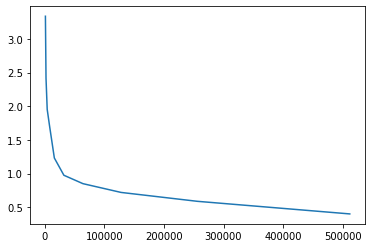

In [ ]:
ITER = 10
p = 5 # dimension of x
data_size= 1000
M = 500
loss_table = np.zeros(ITER)
data_table = np.zeros(ITER)
for i in range(ITER):
    data_size = 1000 * 2**i
    regressor = RandomForestRegressor(M,max_leaf_nodes = int(data_size**0.7))
    X_train = np.random.uniform(low=0, high=1, size=(data_size,p))
    Y_train = m(X_train)
    X_test = np.random.uniform(low=0, high=1, size=(1000,p))
    Y_test = m(X_test)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    loss = sklearn.metrics.mean_squared_error(Y_predicted, Y_test)
    data_table[i] = data_size
    loss_table[i] = loss
plt.plot(data_table,loss_table)

With Small Noise Case:

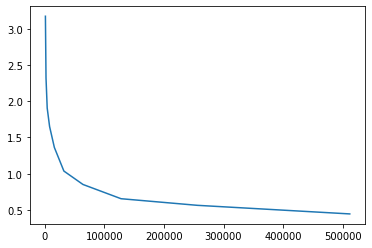

In [ ]:
ITER = 10
p = 5 # dimension of x
data_size= 1000
M = 500
loss_table = np.zeros(ITER)
data_table = np.zeros(ITER)
for i in range(ITER):
    data_size = 1000 * 2**i
    regressor = RandomForestRegressor(M,max_leaf_nodes = int(data_size**0.7))
    X_train = np.random.uniform(low=0, high=1, size=(data_size,p))
    Y_train = small_noise_Y(X_train)
    X_test = np.random.uniform(low=0, high=1, size=(1000,p))
    Y_test = m(X_test)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    loss = sklearn.metrics.mean_squared_error(Y_predicted, Y_test)
    data_table[i] = data_size
    loss_table[i] = loss

plt.plot(data_table,loss_table)

In [ ]:
#X = np.linspace(1,ITER,ITER)
#plt.plot(X,loss_table)

With Large Noise Case:

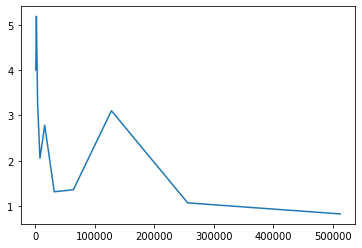

In [ ]:
ITER = 10
p = 5 # dimension of x
data_size= 1000
M = 10
loss_table = np.zeros(ITER)
data_table = np.zeros(ITER)
for i in range(ITER):
    data_size = 1000 * 2**i
    regressor = RandomForestRegressor(M,max_leaf_nodes = int(data_size**0.7))
    X_train = np.random.uniform(low=0, high=1, size=(data_size,p))
    Y_train = large_noise_Y(X_train)
    X_test = np.random.uniform(low=0, high=1, size=(1000,p))
    Y_test = m(X_test)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    loss = sklearn.metrics.mean_squared_error(Y_predicted, Y_test)
    data_table[i] = data_size
    loss_table[i] = loss
plt.plot(data_table,loss_table)

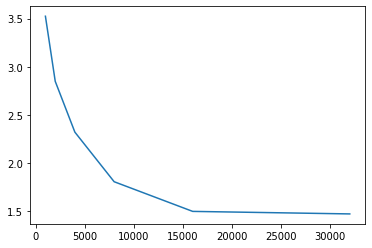

In [ ]:
ITER = 6
p = 5 # dimension of x
data_size= 1000
M = 10
loss_table = np.zeros(ITER)
data_table = np.zeros(ITER)
for i in range(ITER):
    data_size = 1000 * 2**i
    regressor = RandomForestRegressor(M,max_leaf_nodes = int(data_size**0.7))
    X_train = np.random.uniform(low=0, high=1, size=(data_size,p))
    Y_train = m(X_train)
    X_test = np.random.uniform(low=0, high=1, size=(1000,p))
    Y_test = m(X_test)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    loss = sklearn.metrics.mean_squared_error(Y_predicted, Y_test)
    data_table[i] = data_size
    loss_table[i] = loss
plt.plot(data_table,loss_table)

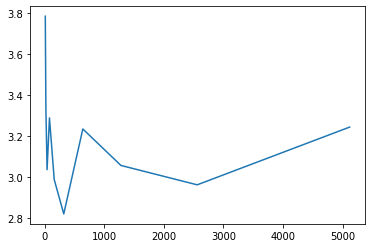

In [ ]:
ITER = 10
p = 5 # dimension of x
data_size= 1000
M = 10
loss_table = np.zeros(ITER)
data_table = np.zeros(ITER)
for i in range(ITER):
    data_size = 1000
    regressor = RandomForestRegressor(M,max_leaf_nodes = int(data_size**0.7))
    X_train = np.random.uniform(low=0, high=1, size=(data_size,p))
    Y_train = m(X_train)
    X_test = np.random.uniform(low=0, high=1, size=(1000,p))
    Y_test = m(X_test)
    regressor.fit(X_train, Y_train)
    Y_predicted = regressor.predict(X_test)
    loss = sklearn.metrics.mean_squared_error(Y_predicted, Y_test)
    data_table[i] = M
    loss_table[i] = loss
    M = 2 * M
plt.plot(data_table,loss_table)